#
#
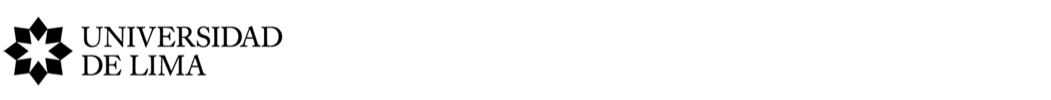

  **FACULTAD DE INGENIERÍA**\
  **CARRERA DE INGENIERÍA INDUSTRIAL**
  
  **ASIGNATURA**: HERRAMIENTAS DE ANÁLISIS DE DATOS\
  **ÁREA**: ANÁLISIS DE DATOS Y OPTIMIZACIÓN DE PROCESOS\
  **PERÍODO ACADÉMICO**: 2024-1



<center> <h2 style="font-size:18pt">Cuaderno de Jupyter 03</h2> </center>


## $\color{green}{\textbf{Caso: Información del Titanic}}$

## $\color{blue}{\textbf{Variables incluidas en el Dataset}}$
* $\color{brown}{\textrm{PassengerId}}$ -> Id del pasajero.
* $\color{brown}{\textrm{Survived}}$ -> Indica si la persona sobrevivió o no al incidente. 0 = No, 1 = Si. 
* $\color{brown}{\textrm{Pclass}}$ -> Para indicar la clase en la que viajaba la persona. 1 = primera, 2 = segunda, 3 = tercera. 
* $\color{brown}{\textrm{Name}}$ -> Nombre del pasajero, almacenado en String. 
* $\color{brown}{\textrm{Sex}}$ -> Sexo del pasajero, male o famale. 
* $\color{brown}{\textrm{Age}}$ -> Edad del pasajero, almacenado con enteros. 
* $\color{brown}{\textrm{Sibsp}}$ -> Número de hermanos, que el pasajero, que estaban a bordo. Almacenado en un entero. 
* $\color{brown}{\textrm{Parch}}$ -> Número de padres, del pasajero, que estaban a bordo. Almacenados en un entero. 
* $\color{brown}{\textrm{Ticket}}$ -> Número de ticket que el pasajero entregó al abordar. 
* $\color{brown}{\textrm{Fare}}$ -> Indica el monto que el pasajero pago para obtener su boleto. Almacenado en un double. 
* $\color{brown}{\textrm{Cabin}}$ -> Indica la cabina que fue asignada al pasajero, almacenada en un String. 
* $\color{brown}{\textrm{Embarked}}$ -> Indica el puerto de embarque, C = cherbourg, Q = Queenstown, S= Southampton.

In [ ]:
# importa la biblioteca pandas con el alias pd.
import pandas as pd

# se cambia el número máximo de filas a mostrar a 70.
pd.options.display.max_rows=70
# se cambia el número máximo de columnas a 25.
pd.options.display.max_columns=25
# se cambia el número máximo del ancho de columnas a 55.
pd.options.display.max_colwidth=55
# se cambia el número máximo de decimales a 8.
pd.options.display.precision=8

# se carga un archivo titanic.xlsx a un DataFrame df.
df=pd.read_excel('titanic.xlsx')

## $\color{blue}{\textbf{Frecuencia de valores únicos por columna.}}$

### $\color{red}{\textrm{col.value}\_\textrm{counts}()}$ 
Devuelve los recuentos de valores únicos de la columna **col**. El objeto resultante estará en orden descendente de modo que el primer elemento sea el elemento que se presente con mayor frecuencia. Excluye los datos faltantes por defecto (dropna=True).

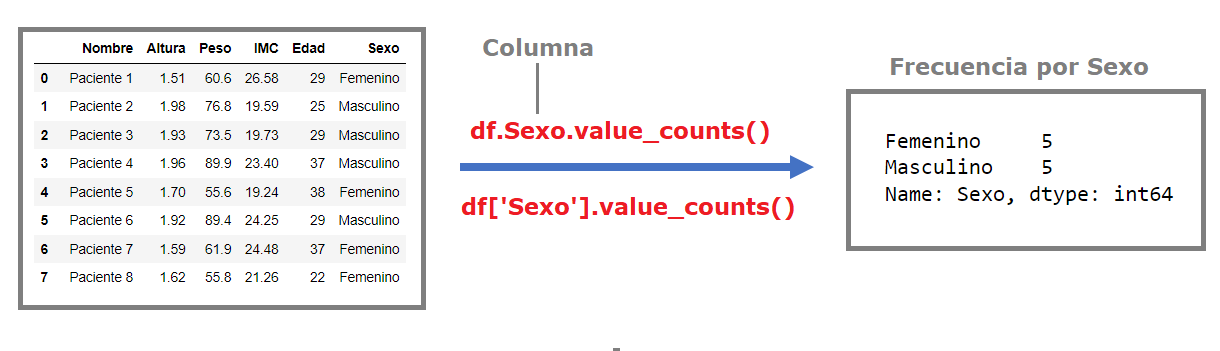

In [ ]:
# se muestra la frecuencia por la columna Sex, de mayor a menor frecuencia.
df['Sex'].value_counts() 

In [ ]:
# se muestra la frecuencia por la columna Survived, de mayor a menor frecuencia.
df.Survived.value_counts()

In [ ]:
# se muestra la frecuencia por la columna Pclass, de menor a mayor frecuencia.
df.Pclass.value_counts(ascending=True)

In [ ]:
# Muestra la frecuencia por la columna Embarked, de mayor a menor frecuencia. 
# No se considera los datos faltantes (dropna=True).
df.Embarked.value_counts(dropna=True)  

## $\color{blue}{\textbf{Filtrando las filas del DataFrame en base a condiciones de las columnas.}}$

Se usan los operadores de comparación y los operadores de lógicos.

### $\color{green}{\textbf{Operadores de comparación.}}$

Operador   | Nombre        |Ejemplo
:--------: | :-----------: |:-------------:
 .>        | Mayor         |df[df.Age>50]
 <         | Menor         |df[df.Fare<100]
 ==        | Igual         |df[df.Sex=="male"]
 .>=       | Mayor o igual |df[df.PassengerId>=880]
 <=        | Menor o igual |df[df.Parch<=3]
 !=        | No es igual   |df[df.Survived!=1]

### $\color{green}{\text{Operadores lógicos.}}$

Operador                  | Nombre|Ejemplo
:--------:                | :----:|:-------------:
$\color{black}{\mbox{\&}}$ | AND   |df[(df.Age > 50) $\color{black}{\mbox{\&}}$ (df.PassengerId >= 880)]
$\color{black}{\mbox{|}}$ | OR    |df[(df.Fare < 100) $\color{black}{\mbox{|}}$ (df.Parch <= 3)]
$\color{black}{\mbox{~}}$ | NOT   |df[$\color{black}{\mbox{~}}$(df.Sex == "male")]

In [ ]:
# se muestra la columna Sex con valores True o False. True es male. False es female.
df.Sex=="male"

In [ ]:
# se muestra las filas del DataFrame que cumplen Sex=='male'.  
df[df['Sex']=="male"]

In [ ]:
# se muestra las filas de hombres, mayores 50 años que sobrevivieron. 
# Con más de una condición el paréntesis es obligatorio.
df[(df.Sex=="male") & (df.Age>50) & (df.Survived==1)]

In [ ]:
# se muestra las filas de hombres o de mujeres de primera clase.
df[(df.Sex=='male')|((df.Sex=='female') & (df.Pclass==1))]

## $\color{blue}{\textbf{Combinando filtros con col.value}\_\textbf{counts}()}$

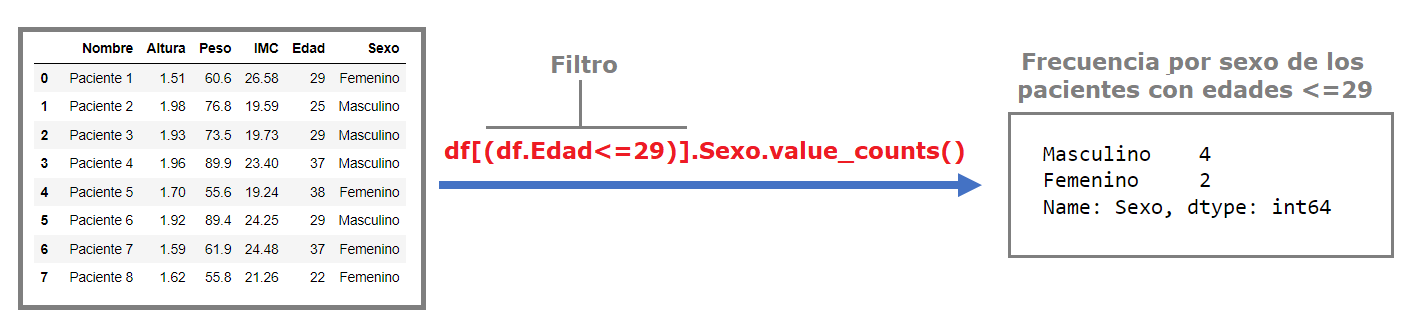

In [ ]:
# se muestra cuantas mujeres murieron(0) y cuantas sobrevivieron(1).
df[df.Sex=='female'].Survived.value_counts()

In [ ]:
# se muestra cuantos hombres de primera clase murieron(0) y cuantos sobrevivieron(1).
df[(df['Sex']=='male')&(df['Pclass']==1)]['Survived'].value_counts()

In [ ]:
# se muestra cuantas mujeres eran de primera clase(1), de segunda clase(2) y tercera clase(3).
df[df.Sex=='female']['Pclass'].value_counts()

In [ ]:
# se muestra cuantos pasajeros menores de edad murieron(0) y cuantos sobrevivieron(1).
df[df.Age<18].Survived.value_counts() 

In [ ]:
# se muestra cuantos hombres menores de edad murieron(0) y cuantas sobrevivieron(1).
df[(df.Sex=='male')&(df.Age<18)].Survived.value_counts()

## $\color{blue}{\textbf{Creación de tablas resumen}}$

### $\color{red}{\textrm{pd.crosstab}(\textrm{ fila , columna })}$ 
Se muestra una tabla de contingencia resultante de cruzar dos o más columnas de un DataFrame. El resultado evalúa las frecuencias de cada combinación de valores.
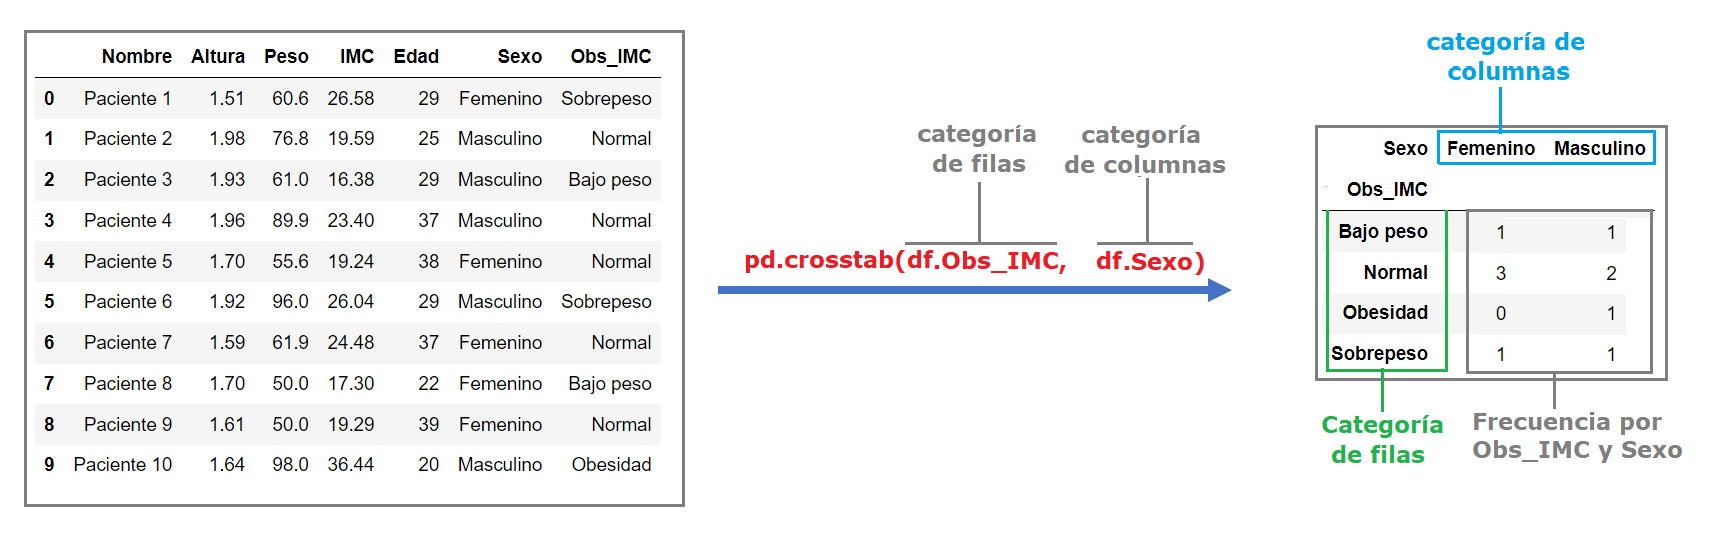

In [ ]:
# se muestra tabla de frecuencia de Sex por Survided. 
# parámetro: margins 
# cuando margins=True, la tabla resultante incluirá los subtotales.
pd.crosstab(df.Survived,df.Sex,margins=True)

#### $\color{green}{\textsf{Interpretación:}}$ 
* 81 mujeres murieron.
* 468 hombres murieron.
* 233 mujeres sobrevivieron.
* 109 hombres sobrevivieron.

De los subtotales:
* 549 personas murieron.
* 342 personas sobrevivieron.

De los subtotales:
* 314 personas fueron mujeres.
* 577 personas fueron hombres.

In [ ]:
# se muestra tabla de frecuencias de Sex y Survived por Pclass.
pd.crosstab([df.Sex,df.Survived],[df.Embarked])

#### $\color{green}{\textsf{Interpretación:}}$ 
* 9 mujeres que embarcaron en el puerto C murieron .
* 9 mujeres murieron que embarcaron en el puerto Q murieron .
* 63 mujeres murieron que embarcaron en el puerto S murieron .
* 64 mujeres que embarcaron en el puerto C sobrevivieron.
* 27 mujeres que embarcaron en el puerto Q sobrevivieron.
* 140 mujeres que embarcaron en el puerto S sobrevivieron.
* 66 hombres que embarcaron en el puerto C murieron.
* 38 hombres que embarcaron en el puerto Q murieron.
* 364 hombres que embarcaron en el puerto S murieron.
* 29 hombres que embarcaron en el puerto C sobrevivieron.
* 3 hombres que embarcaron en el puerto Q sobrevivieron.
* 77 hombres que embarcaron en el puerto S sobrevivieron.

In [ ]:
# se muestra tabla de frecuencia de Sex por Survided.
# parámetro: normalize
# normalize="all" o True incluye una tabla de frecuencias relativas calculadas con respecto al total.
# normalize=0 o "index" incuye una tabla de frecuencias relativas calculadas con respecto al subtotal de cada fila.
# normalize=1 o "columns" incluye una tabla de frecuencias relativas calculadas con respecto al subtotal de cada columna.
# normalize=False incluye una tabla de frecuencias absolutas.
round(pd.crosstab(df.Survived,df.Embarked,normalize=True)*100,2)

#### $\color{green}{\textsf{Interpretación:}}$ 
* 8.44% de pasajeros que se embarcaron en el puerto C murieron.
* 5.29% de pasajeros que se embarcaron en el puerto Q murieron.
* 48.03% de pasajeros que se embarcaron en el puerto S murieron.
* 10.46% de pasajeros que se embarcaron en el puerto C sobrevivieron.
* 3.37% de pasajeros que se embarcaron en el puerto Q sobrevivieron.
* 24.41% de pasajeros que se embarcaron en el puerto S sobrevivieron.

In [ ]:
# se muestra la mayor edad de Sex por Survided.
# aggfunc: función o funciones de agregación a aplicar a los valores dados por el parámetro values.
# values: valores a los que aplicar las funciones de agregación indicadas por el parámetro aggfunc.
pd.crosstab(df.Sex,df.Embarked,aggfunc='max',values=df.Age) 

#### $\color{green}{\textsf{Interpretación:}}$ 
* 60.0 años es la mayor edad de mujeres que se embarcaron en el puerto C.
* 39.0 años es la mayor edad de mujeres que se embarcaron en el puerto Q.
* 63.0 años es la mayor edad de mujeres que se embarcaron en el puerto S.
* 71.0 años es la mayor edad de hombres que se embarcaron en el puerto C.
* 70.5 años es la mayor edad de hombres que se embarcaron en el puerto Q.
* 80.0 años es la mayor edad de hombres que se embarcaron en el puerto S.

### $\color{red}{\textrm{df.groupby}()}$ 
Se muestra grupos de columnas del DataFrame basadas en el criterio dado.
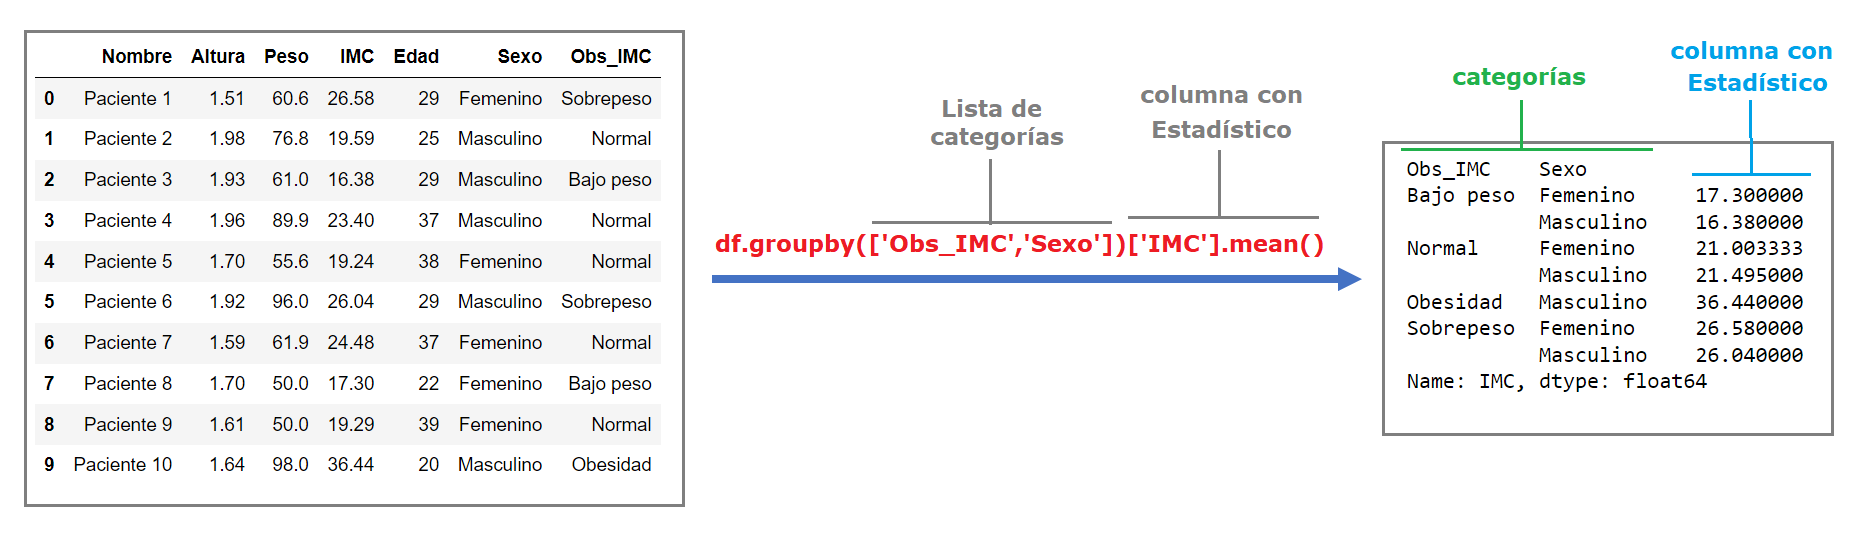

In [ ]:
# se muestra el promedio de edad por Pclass y Sex.
df.groupby(['Pclass','Sex'])['Age'].mean()  

#### $\color{green}{\textsf{Interpretación:}}$ 
* 34.61 es la edad promedio de mujeres que pertenecen a la clase 1.
* 41.28 es la edad promedio de hombres que pertenecen a la clase 1.
* 28.72 es la edad promedio de mujeres que pertenecen a la clase 2.
* 30.74 es la edad promedio de hombres que pertenecen a la clase 2.
* 21.75 es la edad promedio de mujeres que pertenecen a la clase 3.
* 26.51 es la edad promedio de hombres que pertenecen a la clase 3.

In [ ]:
# se muestra la tarifa máxima por Sex y Embarked.
df.groupby(['Sex','Embarked'])['Fare'].max()

#### $\color{green}{\textsf{Interpretación:}}$ 
* 512.33 es la máxima tarifa de mujeres que se embarcaron en el puerto C.
* 90.00 es la máxima tarifa de mujeres que se embarcaron en el puerto Q.
* 263.00 es la máxima tarifa de mujeres que se embarcaron en el puerto S.
* 512.33 es la máxima tarifa de hombres que se embarcaron en el puerto C.
* 90.00 es la máxima tarifa de hombres que se embarcaron en el puerto Q.
* 263.00 es la máxima tarifa de hombres que se embarcaron en el puerto S.

In [ ]:
# se muestra cuantas mujeres y cuantos hombres sobrevivieron por clase. 
# Recordar 1:sobrevivieron, 0:murieron.
df.groupby(['Pclass','Sex'])['Survived'].sum()

#### $\color{green}{\textsf{Interpretación:}}$ 
* 91 mujeres que pertenecen a la clase 1 sobrevivieron.
* 45 hombres que pertenecen a la clase 1 sobrevivieron.
* 70 mujeres que pertenecen a la clase 2 sobrevivieron.
* 17 hombres que pertenecen a la clase 2 sobrevivieron.
* 72 mujeres que pertenecen a la clase 3 sobrevivieron.
* 47 hombres que pertenecen a la clase 3 sobrevivieron.

In [ ]:
# se muestra cuantas mujeres y hombres hay por clase:
df.groupby(['Pclass','Sex'])['Survived'].count() 

#### $\color{green}{\textsf{Interpretación:}}$ 
* Habián en el titanic 94 mujeres que pertenecían a la clase 1.
* Habián en el titanic 122 hombres que pertenecían a la clase 1.
* Habián en el titanic 76 mujeres que pertenecían a la clase 2.
* Habián en el titanic 108 hombres que pertenecían a la clase 2.
* Habián en el titanic 144 mujeres que pertenecían a la clase 3.
* Habián en el titanic 347 hombres que pertenecían a la clase 3.

In [ ]:
# en el DataFrame del titanic, se crea la columna SumaParientes con la suma de las columnas SibSp y Parch
df['SumaParientes']=df.SibSp+df.Parch
df.head(5)

In [ ]:
# se muestra por Embarked, la edad promedio, la tarifa máxima y la suma de parientes (padres e hijos)
df.groupby('Embarked').agg({'Age':['mean'],'Fare':['max'],'SumaParientes':['sum']})

#### $\color{green}{\textsf{Interpretación:}}$ 
* Los pasajeros que abordaron en el puerto C tenían una edad promedio de 30.81, la tarifa promedio fue de 512.33 y el total de parientes fue 126.
* Los pasajeros que abordaron en el puerto Q tenían una edad promedio de 28.09, la tarifa promedio fue de 90.00 y el total de parientes fue 46.
* Los pasajeros que abordaron en el puerto S tenían una edad promedio de 29.45, la tarifa promedio fue de 263.00 y el total de parientes fue 634.